In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ecommerce = pd.read_csv('ecommerce.csv')

In [4]:
# top 5 rows
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [5]:
# general info
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Observation:
1. No missing values!
2. Seems need to convert `InvoiceDate` to datetime format

In [6]:
# check for duplicates
ecommerce.duplicated().sum()

0

No duplicates! Good!

In [8]:
# convert InvoiceDate to datetime format
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'])
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [9]:
# check info again
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   int64         
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   int64         
 7   Country      4870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 304.5+ KB


## EDA Questions
1. What are Top 10 products with the most transactions?
2. What are Top 10 products with the LEAST transactions?
3. Who are Top 10 Customers with the most money spend?
4. How many distinct products sold? How is their price distribution?
5. From what countries the customers come? Which country has the most royal customers?
6. How is monthly count buyers profile (time series)?
7. How is monthly omzet profile (time series)?

### Top 10 products with most/least transactions
We need to perform group by aggregation. Basis group-by is `Description`, while number of transactions = count `InvoiceNo`. After aggregating, do appropriate sorting and truncation.

In [10]:
# Top 10 products with the most transactions
top10_prod = (ecommerce
            .groupby('Description') 
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,Description,num_trx
793,JUMBO BAG RED RETROSPOT,24
1060,PARTY BUNTING,22
1238,REGENCY CAKESTAND 3 TIER,21
1724,WHITE HANGING HEART T-LIGHT HOLDER,19
66,60 TEATIME FAIRY CAKE CASES,18
1385,SET OF 3 CAKE TINS PANTRY DESIGN,16
1416,SET OF 4 PANTRY JELLY MOULDS,16
1205,RED RETROSPOT CHARLOTTE BAG,15
770,JAM MAKING SET PRINTED,15
108,ASSORTED COLOUR BIRD ORNAMENT,15


In [11]:
# Top 10 products with the least transactions
low10_prod = (ecommerce
            .groupby('Description') 
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index()
            .sort_values('num_trx',ascending=True)
            .head(10)
            )
low10_prod

,Description,num_trx
903,MEASURING TAPE BABUSHKA PINK,1
584,FRENCH LAUNDRY SIGN BLUE METAL,1
1289,ROLL WRAP VINTAGE CHRISTMAS,1
587,FRENCH STYLE STORAGE JAR CAFE,1
588,FRENCH TOILET SIGN BLUE METAL,1
1288,ROLL WRAP 50'S RED CHRISTMAS,1
590,FRIDGE MAGNETS LES ENFANTS ASSORTED,1
1287,ROLL WRAP 50'S CHRISTMAS,1
592,FROG CANDLE,1
593,FRYING PAN PINK POLKADOT,1


In [12]:
top10_cust = (ecommerce
            .groupby('Description') 
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,Description,num_trx
793,JUMBO BAG RED RETROSPOT,24
1060,PARTY BUNTING,22
1238,REGENCY CAKESTAND 3 TIER,21
1724,WHITE HANGING HEART T-LIGHT HOLDER,19
66,60 TEATIME FAIRY CAKE CASES,18
1385,SET OF 3 CAKE TINS PANTRY DESIGN,16
1416,SET OF 4 PANTRY JELLY MOULDS,16
1205,RED RETROSPOT CHARLOTTE BAG,15
770,JAM MAKING SET PRINTED,15
108,ASSORTED COLOUR BIRD ORNAMENT,15


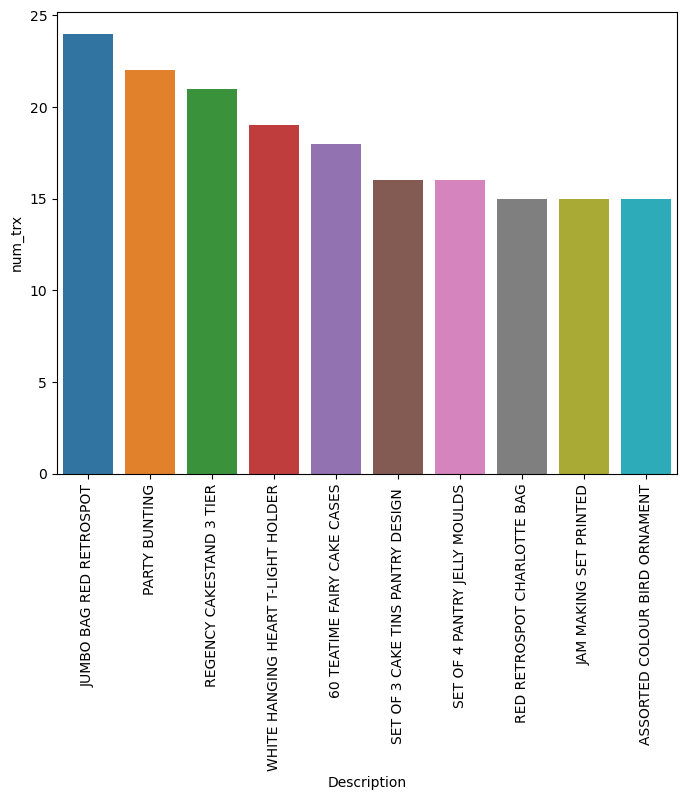

In [13]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=top10_prod, x='Description', y='num_trx')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Low 10 products in terms of transactions
low10_prod = (ecommerce
            .groupby('Description')
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index()
            .sort_values('num_trx',ascending=True)
            .head(10)
            )
low10_prod

,Description,num_trx
903,MEASURING TAPE BABUSHKA PINK,1
584,FRENCH LAUNDRY SIGN BLUE METAL,1
1289,ROLL WRAP VINTAGE CHRISTMAS,1
587,FRENCH STYLE STORAGE JAR CAFE,1
588,FRENCH TOILET SIGN BLUE METAL,1
1288,ROLL WRAP 50'S RED CHRISTMAS,1
590,FRIDGE MAGNETS LES ENFANTS ASSORTED,1
1287,ROLL WRAP 50'S CHRISTMAS,1
592,FROG CANDLE,1
593,FRYING PAN PINK POLKADOT,1


Not so interesting to visualize, because all have single transaction.

### Top 10 Customers in money spend
We need to create a new column `total_price = Quantity * UnitPrice`. Then sum it based on group-by CustomerID.

In [15]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [16]:
# create total_price column
ecommerce['total_price'] = ecommerce['Quantity'] * ecommerce['UnitPrice']

# group by aggregation
top10_cust = (ecommerce
            .groupby('CustomerID')
            .agg(total_spend=('total_price','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,CustomerID,total_spend
758,14646,3569.53
1655,17450,3521.44
1119,15769,3509.00
1879,18102,2940.42
843,14911,2149.65
1195,16000,2046.00
565,14088,1900.38
1263,16210,1728.00
1214,16029,1472.40
1672,17511,1334.64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '14646'),
  Text(1, 0, '17450'),
  Text(2, 0, '15769'),
  Text(3, 0, '18102'),
  Text(4, 0, '14911'),
  Text(5, 0, '16000'),
  Text(6, 0, '14088'),
  Text(7, 0, '16210'),
  Text(8, 0, '16029'),
  Text(9, 0, '17511')])

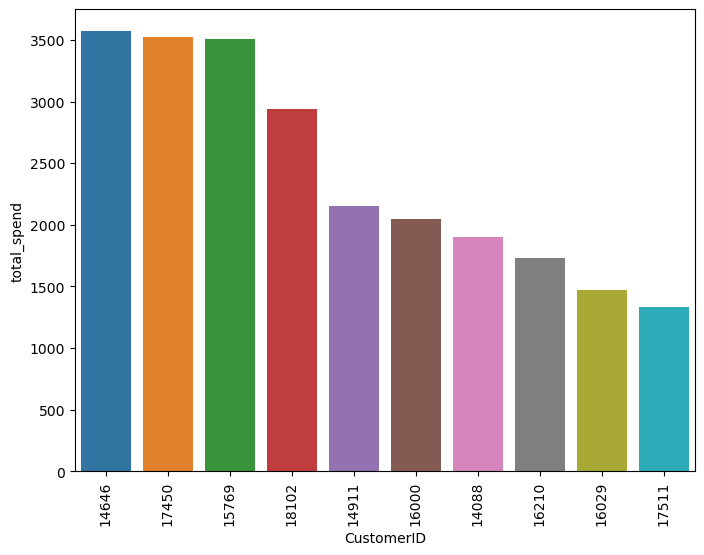

In [17]:
# visualize it
plt.figure(figsize=(8,6))
top10_cust['CustomerID'] = top10_cust['CustomerID'].astype(str)
sns.barplot(data=top10_cust, x='CustomerID', y='total_spend')
plt.xticks(rotation=90)

### Distinct Product Sold and their price distribution
We need to create a sub-dataframe containing `Description` and `UnitPrice` columns only, and ensure no duplication.

In [18]:
ecommerce['Description'].nunique()

1807

In [19]:
#dataset yang baru yang ada level product
#tidak ada duplikasi pproduct
prod = (ecommerce[['Description','UnitPrice']]
        .drop_duplicates(subset='Description',ignore_index=True))
prod.head()

,Description,UnitPrice
0,COOK WITH WINE METAL SIGN,2.08
1,WOODEN PICTURE FRAME WHITE FINISH,2.55
2,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1.65
3,CHARLIE & LOLA WASTEPAPER BIN FLORA,1.25
4,KIDS RAIN MAC PINK,0.85


In [20]:
# number of products
prod.shape[0]

1807

In [21]:
prod['Description'].nunique()

1807

<Axes: xlabel='UnitPrice', ylabel='Count'>

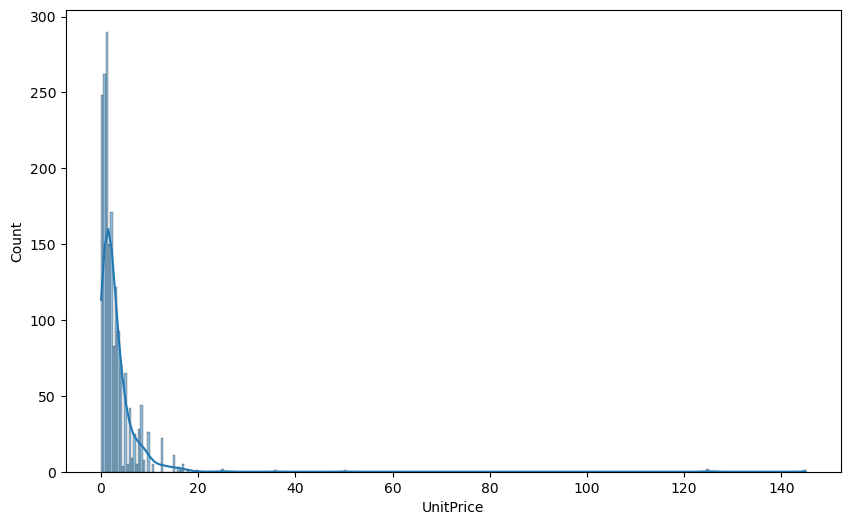

In [22]:
# price distribution
plt.figure(figsize=(10,6))
sns.histplot(data=prod, x='UnitPrice', kde = True)

In [23]:
prod.describe()

,UnitPrice
count,1807.000000
mean,3.050742
std,6.201232
min,0.040000
25%,0.850000
50%,1.650000
75%,3.750000
max,145.000000


### Customer Countries and which one is the best spender overall
We need to group by `Country` and `CustomerID`, then take the sum of `total_price`. After that, we draw boxplot side by side countries.

In [24]:
country_user = (ecommerce
                .groupby(['Country','CustomerID'])
                .agg(total_spend=('total_price','sum'))
                .reset_index())
country_user.head()

,Country,CustomerID,total_spend
0,Australia,12388,17.70
1,Australia,12393,16.60
2,Australia,12415,850.95
3,Australia,12431,51.75
4,Austria,12358,71.40


In [25]:
country_user['Country'].nunique()

31

In [26]:
country_user.Country.value_counts()

Country
United Kingdom          1735
Germany                   49
France                    43
Switzerland               12
Spain                     12
Belgium                   11
Portugal                   8
Sweden                     5
Norway                     5
Finland                    5
Australia                  4
Austria                    4
Italy                      4
Greece                     4
Channel Islands            4
Cyprus                     4
Denmark                    3
Netherlands                3
EIRE                       3
Unspecified                3
Israel                     2
Japan                      2
Malta                      1
Poland                     1
RSA                        1
Singapore                  1
Lebanon                    1
Canada                     1
United Arab Emirates       1
Brazil                     1
Iceland                    1
Name: count, dtype: int64

In [27]:
# filter to top 5 contries (most CustomerID) only
# using isin technique
top5_countries = ['United Kingdom','Germany','France','Switzerland','Spain']
country_user = country_user[country_user['Country'].isin(top5_countries)]
country_user

,Country,CustomerID,total_spend
40,France,12490,148.40
41,France,12491,26.85
42,France,12494,49.20
43,France,12508,9.60
44,France,12509,8.50
...,...,...,...
1926,United Kingdom,18272,44.10
1927,United Kingdom,18276,7.90
1928,United Kingdom,18278,15.00
1929,United Kingdom,18280,17.85


<Axes: xlabel='Country', ylabel='total_spend'>

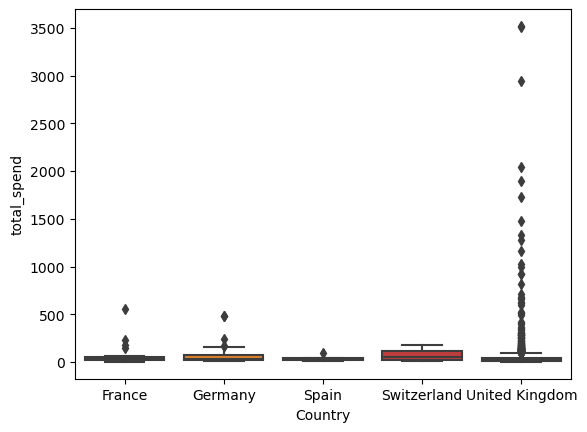

In [28]:
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

In [29]:
# Clip max spend at 500 so that we can easily compare the boxplots
country_user['total_spend'] = country_user['total_spend'].clip(upper=500)

<Axes: xlabel='Country', ylabel='total_spend'>

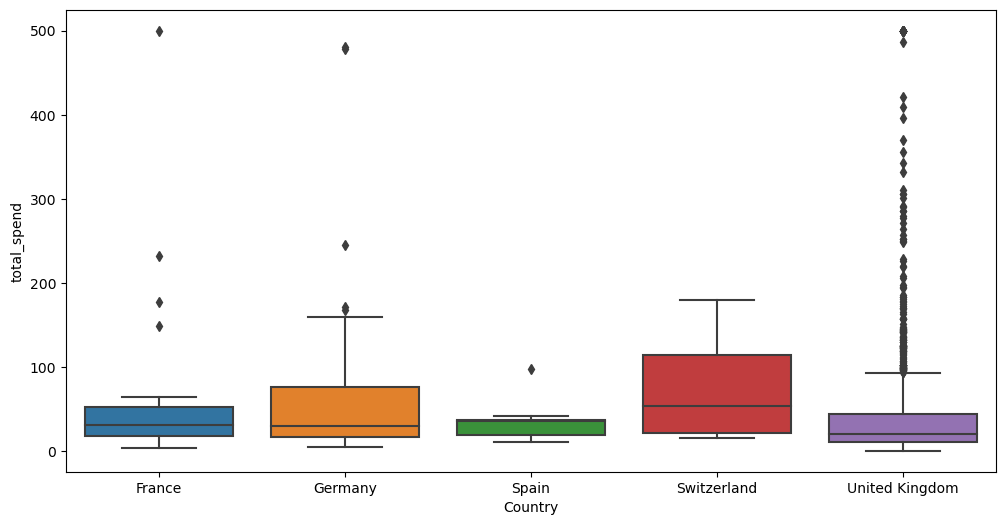

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

### Monthly time series of num buyers and total omzet

In [31]:
# derive InvoiceMonth column
ecommerce['InvoiceMonth'] = ecommerce['InvoiceDate'].dt.to_period('M')
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceMonth
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08,2011-05
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10,2011-07
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65,2011-07
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00,2011-07
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55,2011-02


In [32]:
# monthly_data
# derive number of buyers / month
# derive total omzet /month
monthly_data = (ecommerce
                .groupby('InvoiceMonth')
                .agg(num_buyer=('CustomerID','nunique'),
                     total_omzet=('total_price','sum'))
                .reset_index())

monthly_data['InvoiceMonth'] = monthly_data['InvoiceMonth'].astype(str) 
monthly_data

,InvoiceMonth,num_buyer,total_omzet
0,2010-12,221,10810.55
1,2011-01,209,6247.52
2,2011-02,197,6152.46
3,2011-03,247,7162.64
4,2011-04,211,6357.63
5,2011-05,254,6987.24
6,2011-06,224,7203.93
7,2011-07,231,7569.27
8,2011-08,237,9904.91
9,2011-09,328,9761.11


# Interpretation
Observe peak is in Nov, why is it?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

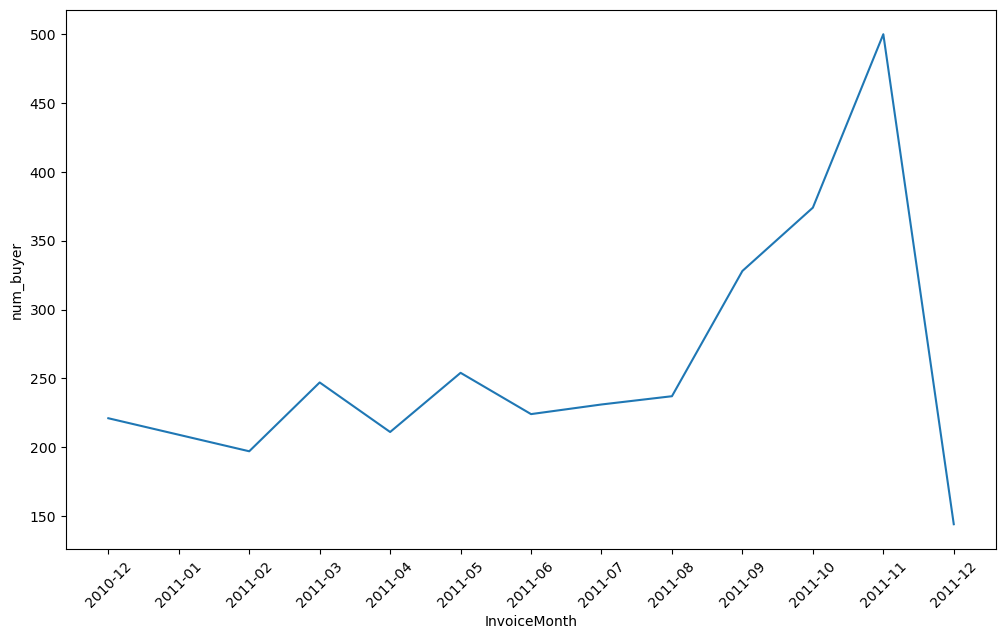

In [33]:
# num buyer progression
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_data,
             x='InvoiceMonth',
             y='num_buyer')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

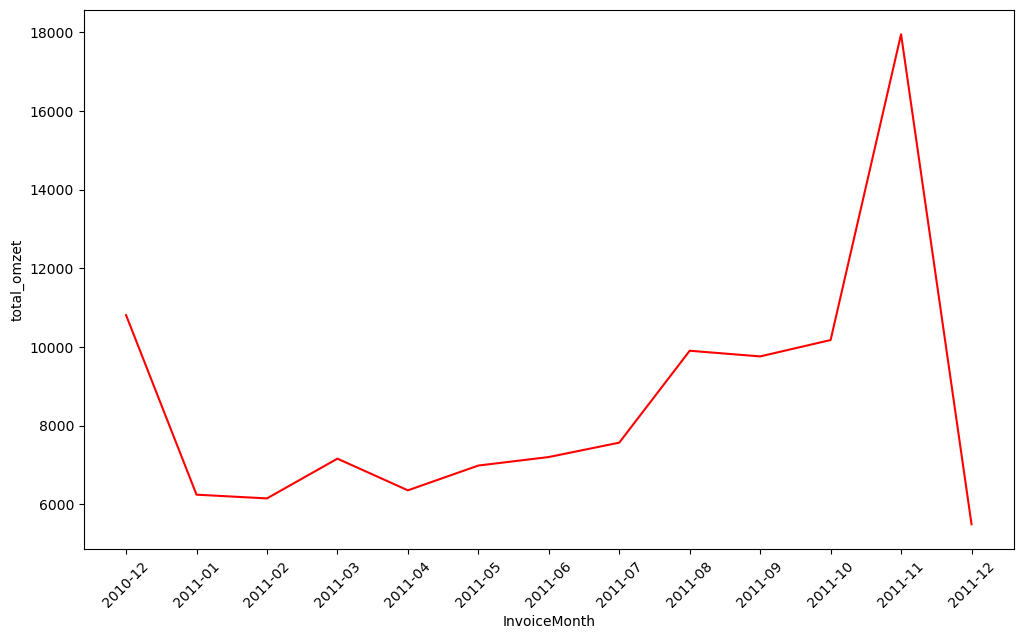

In [35]:
# omzet progression
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_data,
             x='InvoiceMonth',
             y='total_omzet',
             color='red')
plt.xticks(rotation=45)